# **Spotify Track Popularity Prediction**

## **1) Install and import necessary libraries**

**Import libraries**

In [20]:
#pip install xgboost
#pip install lightgbm
#pip install scikit-learn==1.2.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## **2) Load the dataset**

In [4]:
# Load dataset
df = pd.read_csv('music_dataset.csv')

## **3) Exploratory Data Analysis (EDA)**

In [5]:
# Display metadata about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
# Display the first 5 rows of the dataset
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# Display the last 5 rows of the dataset
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [8]:
# Drop the column 'Unnamed'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Display summary statistics for all numeric columns
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [10]:
# Display dataset shape
df.shape

(114000, 20)

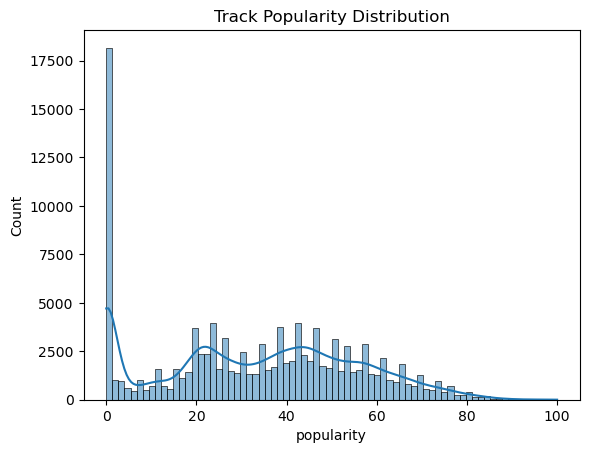

In [11]:
# Distribution of target variable
sns.histplot(df['popularity'], kde=True)
plt.title('Track Popularity Distribution')
plt.show()

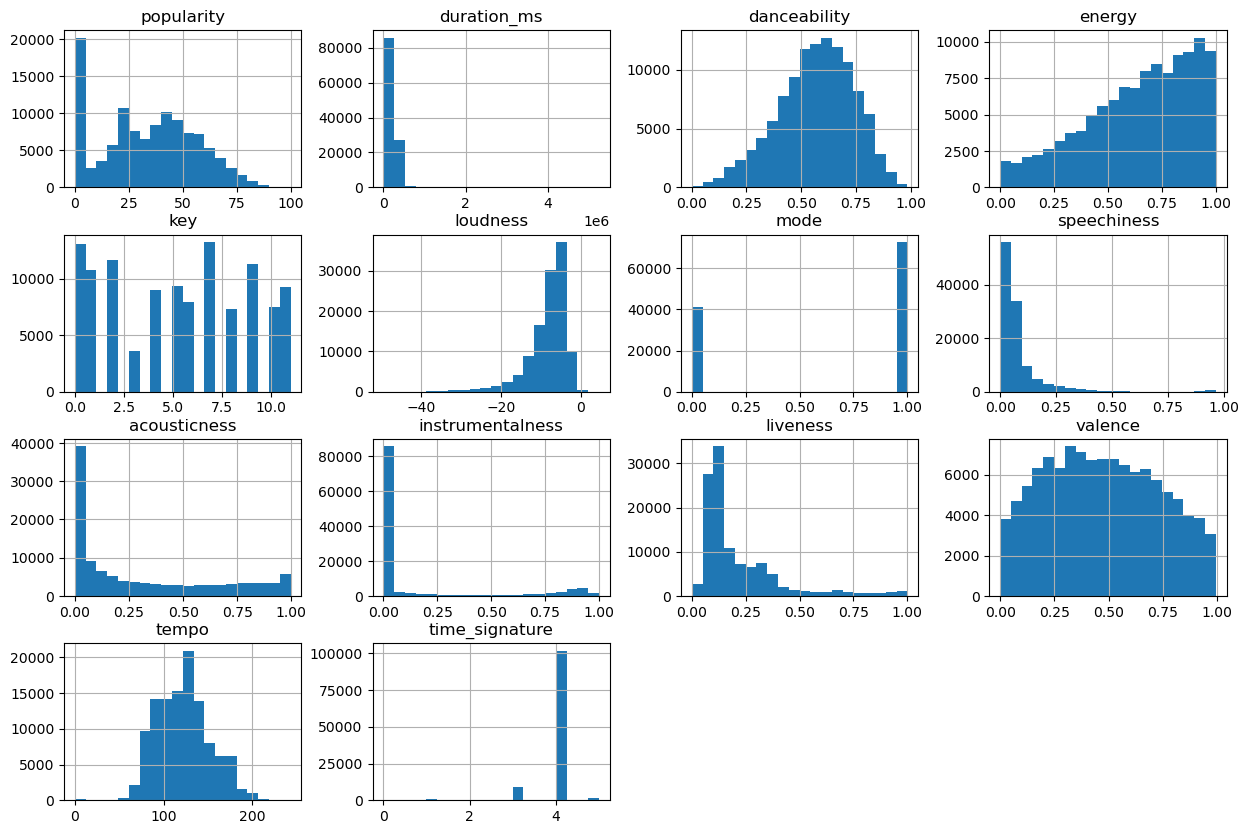

In [12]:
# Visualize numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

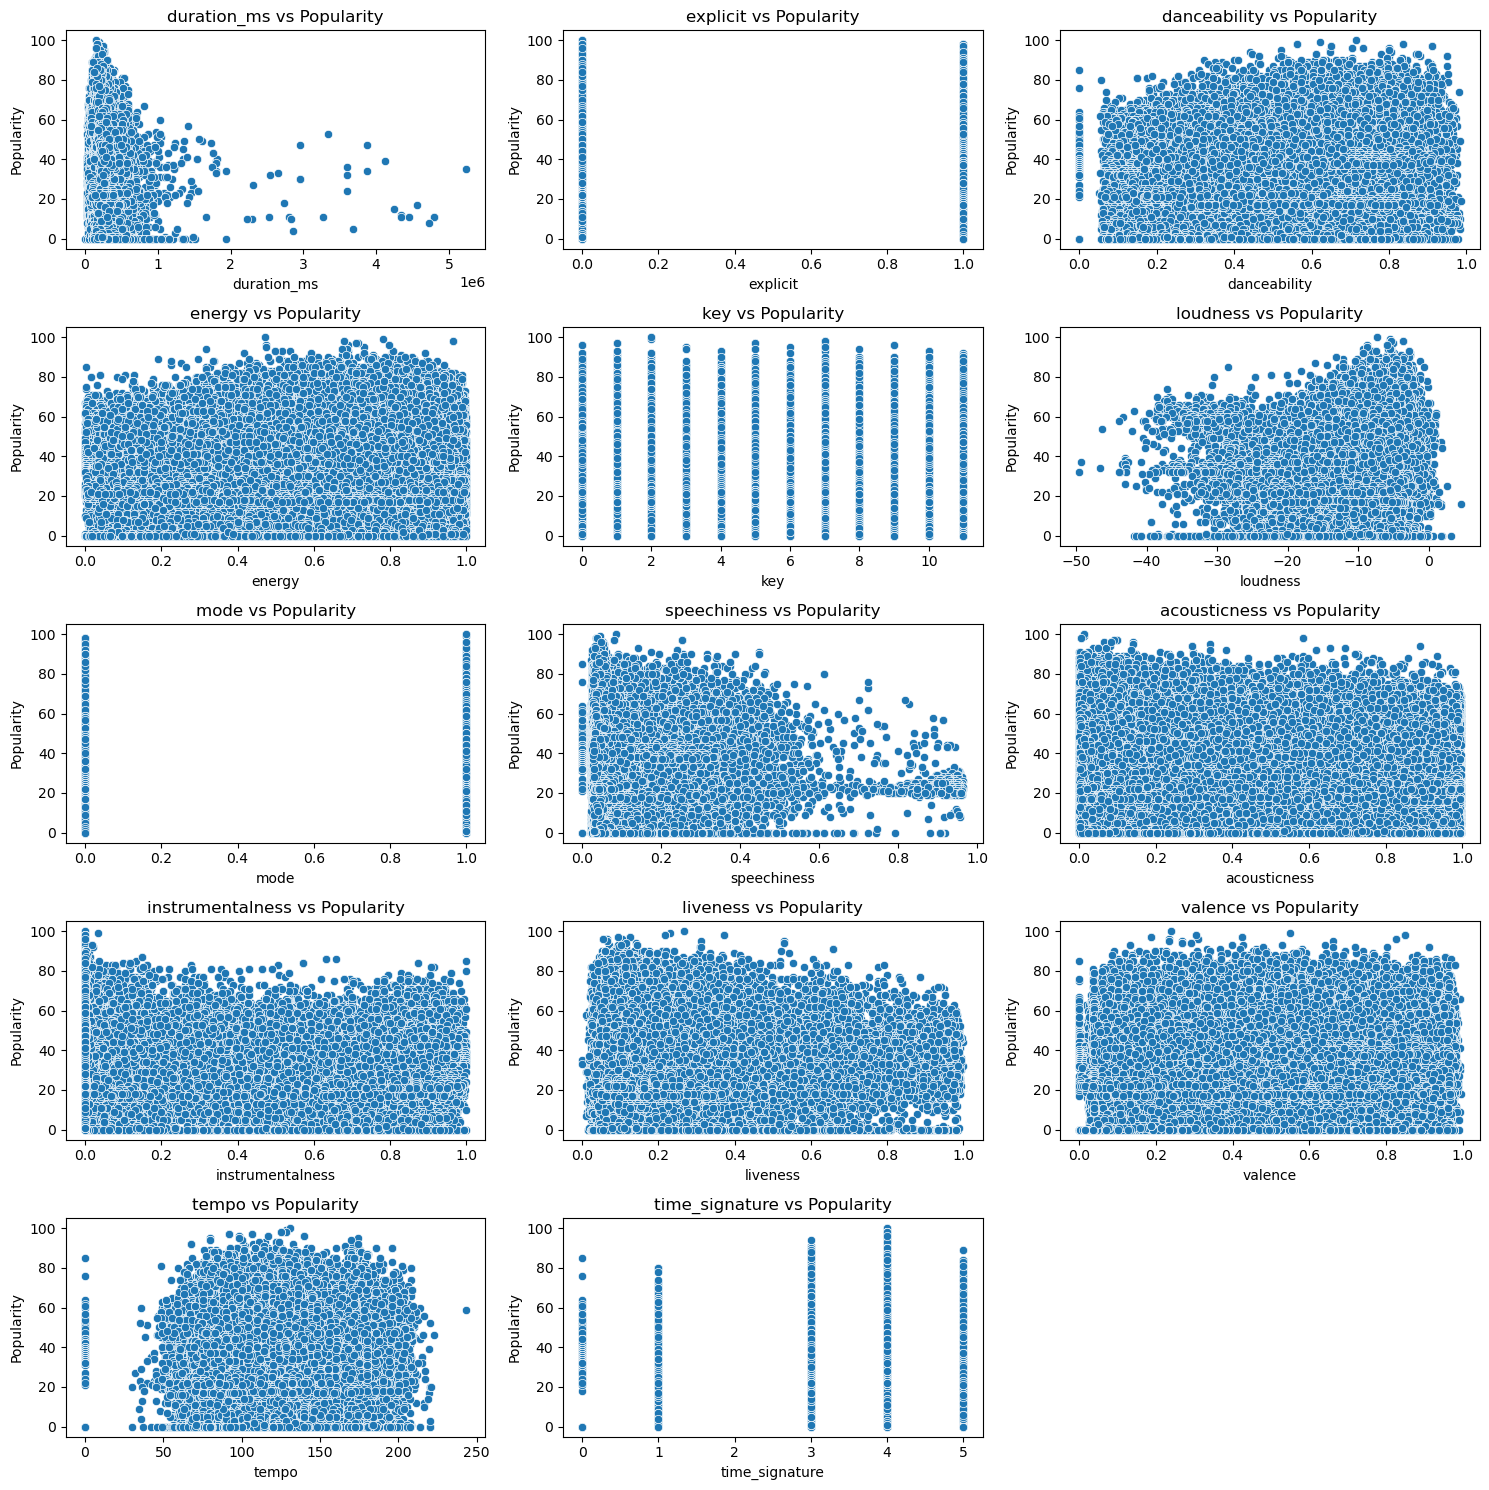

In [13]:
# List of features to visualize against popularity
features = ['duration_ms','explicit','danceability', 'energy','key','loudness','mode','speechiness', 'acousticness', 'instrumentalness','liveness','valence', 'tempo','time_signature']

# Create scatter plots
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.scatterplot(x=df[feature], y=df['popularity'])
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

track_genre
pop-film          59283
k-pop             56896
chill             53651
sad               52379
grunge            49594
                  ...  
chicago-house     12339
detroit-techno    11174
latin              8297
romance            3245
iranian            2210
Name: popularity, Length: 114, dtype: int64


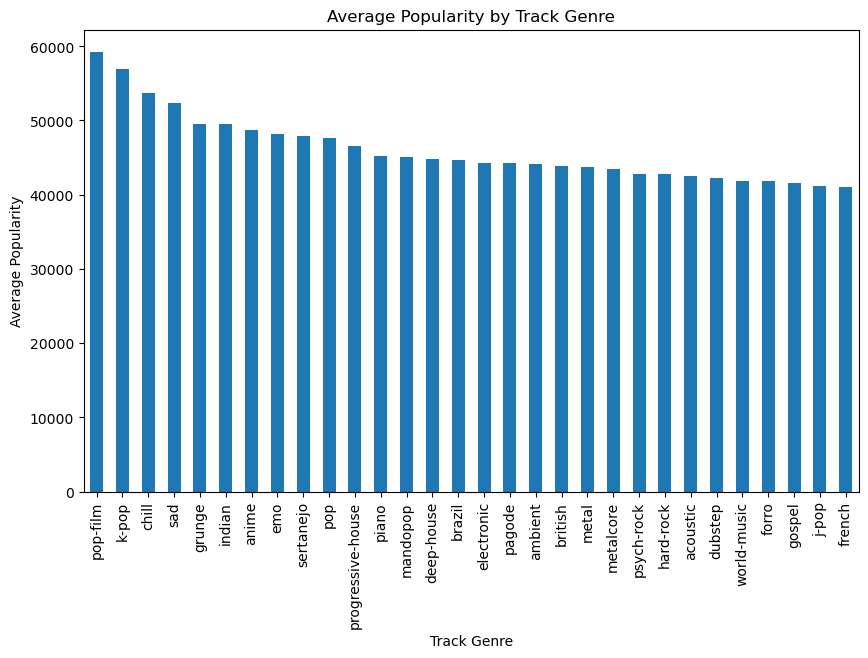

In [14]:
# Average popularity by track genre
genre_popularity = df.groupby('track_genre').popularity.sum().sort_values(ascending=False)
print(genre_popularity)

# Plot the results
genre_popularity.head(30).plot(kind='bar', figsize=(10, 6), title='Average Popularity by Track Genre')
plt.xlabel('Track Genre')
plt.ylabel('Average Popularity')
plt.show()

artists
The Beatles                     17021
Linkin Park                     12560
BTS                             10358
Prateek Kuhad                   10054
Elvis Presley                    9307
                                ...  
Wiz Khalifa                         0
Witness the Existence               0
Sharapov;Alexandrjfk                0
Sharapov;Last Midnight Train        0
Semisonic                           0
Name: popularity, Length: 31437, dtype: int64


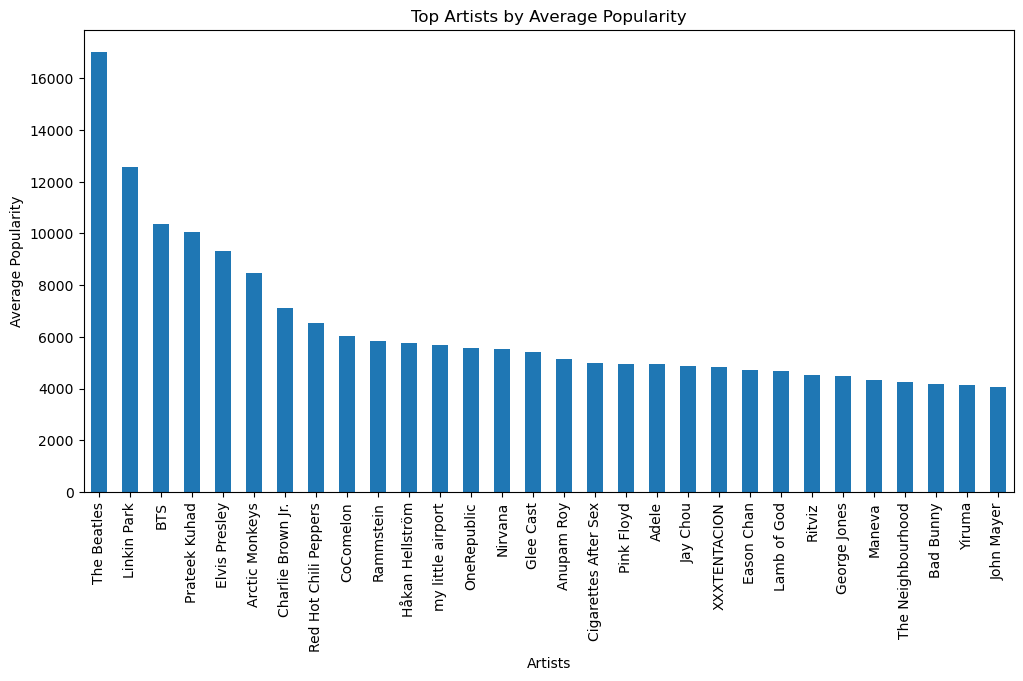

In [15]:
# Average popularity by artist
artist_popularity = df.groupby('artists').popularity.sum().sort_values(ascending=False)
print(artist_popularity)  # Top 10 artists with the highest average popularity

# Visualize the top artists
artist_popularity.head(30).plot(kind='bar', figsize=(12, 6), title='Top Artists by Average Popularity')
plt.xlabel('Artists')
plt.ylabel('Average Popularity')
plt.show()

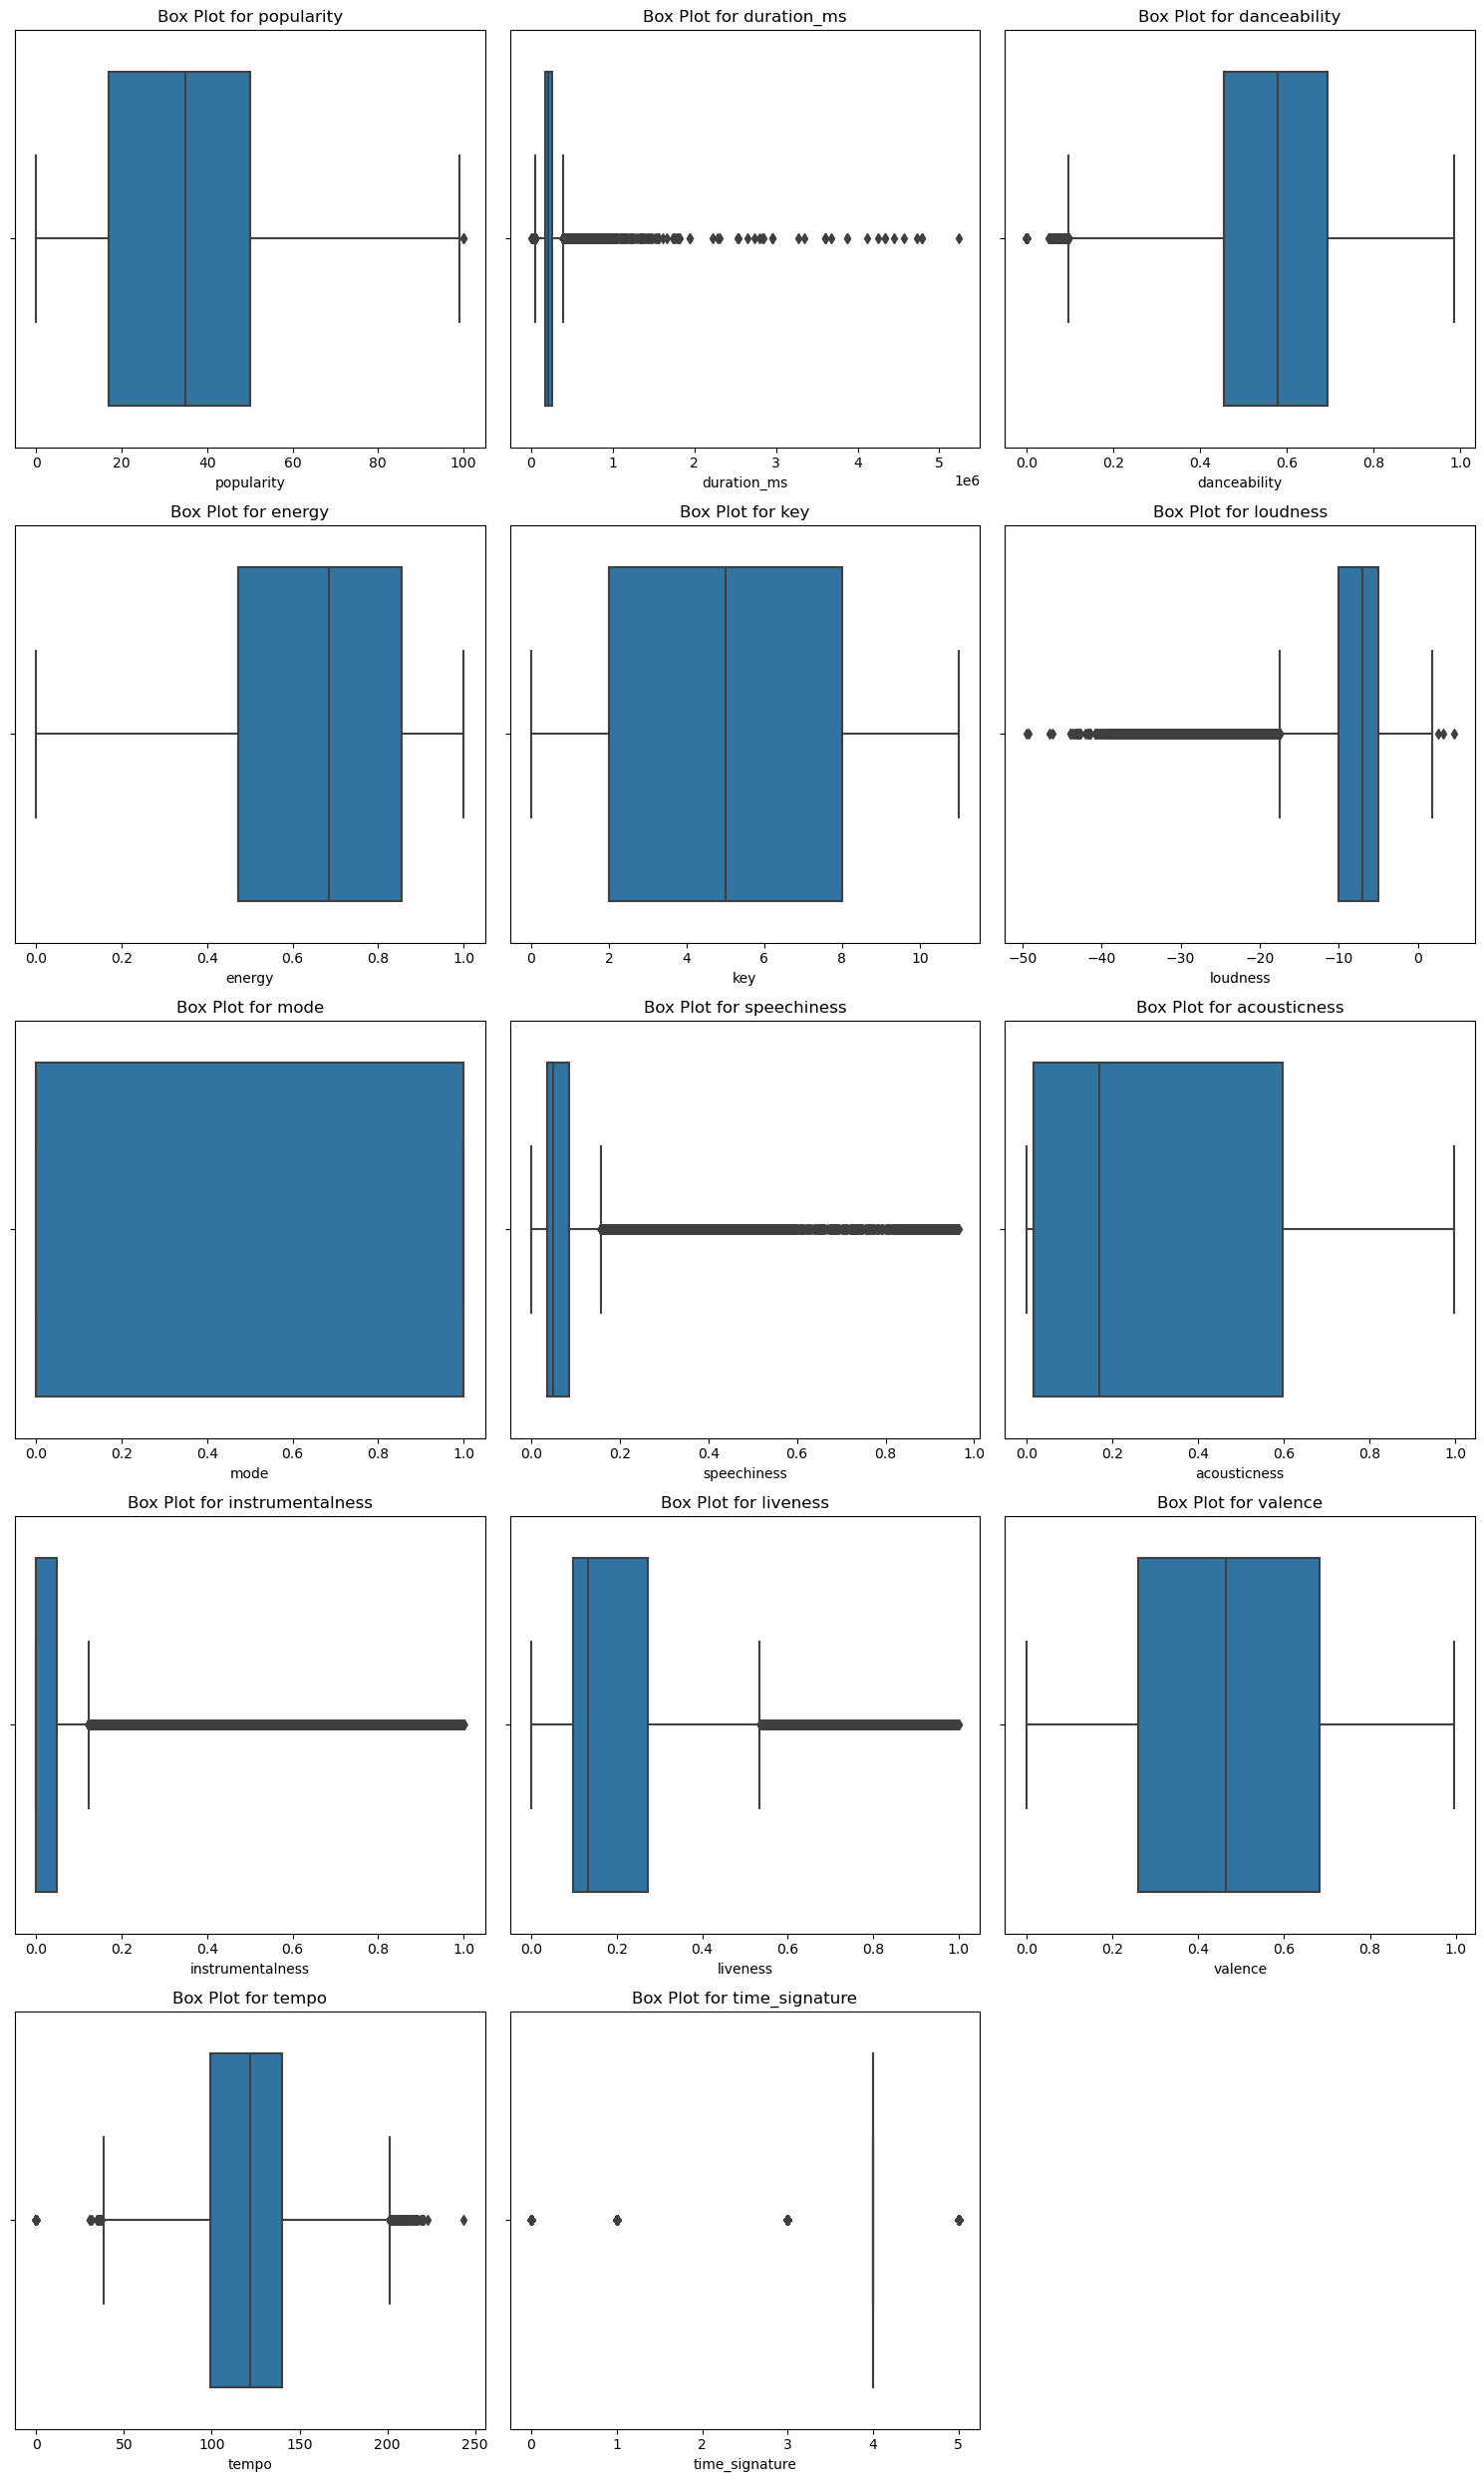

In [16]:
# List of numerical columns to plot
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns for subplots
num_cols = 3  # You can adjust this to suit your preference
num_rows = (len(numerical_columns) // num_cols) + (1 if len(numerical_columns) % num_cols != 0 else 0)

# Set up the figure
plt.figure(figsize=(15, 5 * num_rows))

# Create a box plot for each numerical feature
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.tight_layout()

plt.show()


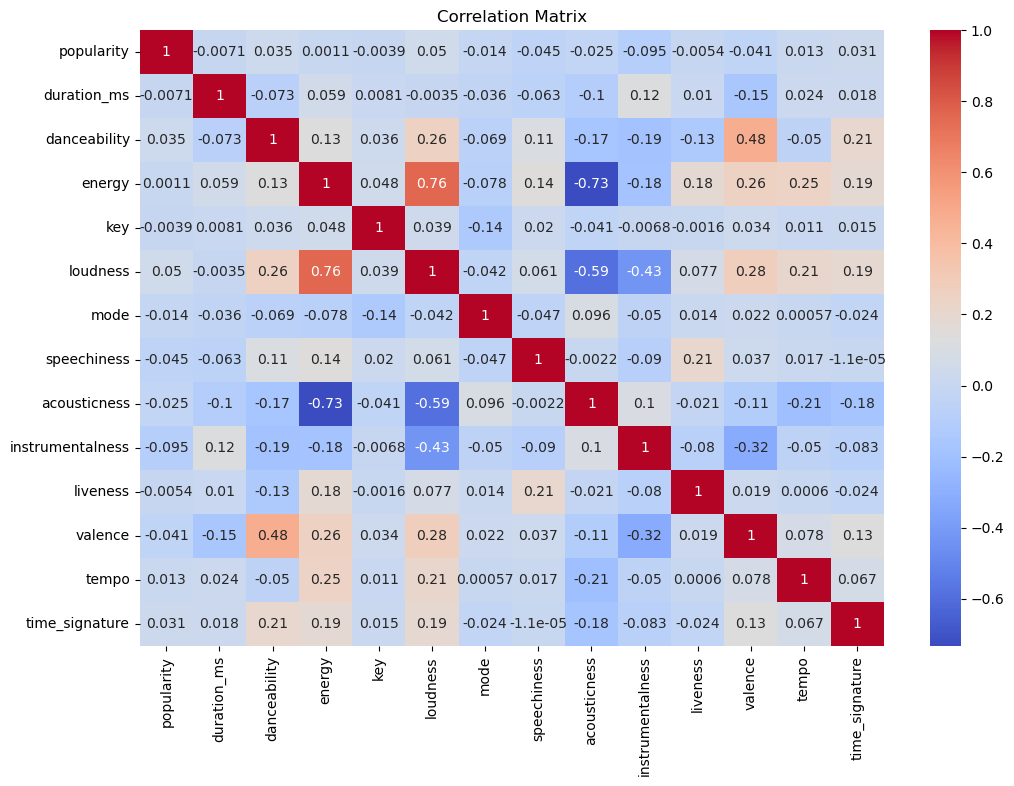

In [17]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Display missing values
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## **4) Data Preprocessing**

In [21]:
# Fill missing values for categorical features
df['artists'] = df['artists'].fillna('Unknown')
df['album_name'] = df['album_name'].fillna('Unknown')
df['track_name'] = df['track_name'].fillna('Unknown')

In [22]:
# One-hot encode for track_genre
df = pd.get_dummies(df, columns=['track_genre'], drop_first=True)

In [23]:
# Label encode the 'artists' column
label_encoder = LabelEncoder()
df['artists_encoded'] = label_encoder.fit_transform(df['artists'])

In [24]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,artists_encoded
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0,0,0,0,0,0,0,0,10357
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0,0,0,0,0,0,0,0,0,3287
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0,0,0,0,0,0,0,0,0,12397
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0,0,0,0,0,0,0,0,0,14839
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0,0,0,0,0,0,0,0,0,5255


In [25]:
# Existing numerical features
numerical_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'loudness',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                      'tempo', 'time_signature','artists_encoded']

# One-hot encoded genre features
genre_columns = [col for col in df.columns if col.startswith('track_genre_')]

# Combine numerical and genre columns (excluding non-relevant columns like 'Unnamed: 0' and 'track_id')
selected_features = numerical_features + genre_columns

# Select features and target variable
X = df[selected_features]
y = df['popularity']  # Target variable

## **5) Split data**

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **6) Model Development and Evaluation**

### **XGBoost Regressor**

**Train the Model with Default Parameters**

In [27]:
# Train XGBoost with default parameters
xgb_default = XGBRegressor(random_state=42)
xgb_default.fit(X_train, y_train)
xgb_pred = xgb_default.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE (default): {xgb_rmse}")

XGBoost RMSE (default): 17.42594188484448


**Model Training and Hyperparameter Tuning**

In [28]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)

# Best XGBoost model
best_xgb = xgb_grid.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

**Evaluation**

In [ ]:
xgb_predictions = best_xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost - MSE: {xgb_mse}, MAE: {xgb_mae}, R^2: {xgb_r2}")

### **LightGBM Regressor**

**Train the Model with Default Parameters**

In [ ]:
# Train LightGBM with default parameters
lgbm_default = LGBMRegressor(random_state=42)
lgbm_default.fit(X_train, y_train)
lgbm_pred = lgbm_default.predict(X_test)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
print(f"LightGBM RMSE (default): {lgbm_rmse}")

**Model Training and Hyperparameter Tuning**

In [ ]:
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

lgbm = LGBMRegressor(random_state=42)
lgbm_grid = GridSearchCV(estimator=lgbm, param_grid=lgbm_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lgbm_grid.fit(X_train, y_train)

# Best LightGBM model
best_lgbm = lgbm_grid.best_estimator_

**Evaluation**

In [ ]:
lgbm_predictions = best_lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_mae = mean_absolute_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

print(f"LightGBM - MSE: {lgbm_mse}, MAE: {lgbm_mae}, R^2: {lgbm_r2}")